In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import graphviz 
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os

for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [2]:
data = pd.read_csv (os.path.join(dirname, filename))

In [3]:
# Badanie i obróbka bazy danych

In [4]:
# Rodzaj danych
data.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
# Kolumny i rekordy
print("Ilość kolumn: {0[1]}, ilość rekordów: {0[0]} ".format(data.shape))

Ilość kolumn: 24, ilość rekordów: 129880 


In [6]:
# Wszystkie wartości w poszczególnej kolumnie wraz z procentowym udziałem
for column in data.columns.values:
    print('<------------------------------------------------------------>')
    print(data[column].value_counts(normalize=True) * 100)
    print('<------------------------------------------------------------>\n')

<------------------------------------------------------------>
2047      0.00077
109855    0.00077
122129    0.00077
115986    0.00077
118035    0.00077
           ...   
8913      0.00077
15058     0.00077
13011     0.00077
2772      0.00077
0         0.00077
Name: Unnamed: 0, Length: 129880, dtype: float64
<------------------------------------------------------------>

<------------------------------------------------------------>
Female    50.738374
Male      49.261626
Name: Gender, dtype: float64
<------------------------------------------------------------>

<------------------------------------------------------------>
Loyal Customer       81.690791
disloyal Customer    18.309209
Name: customer_type, dtype: float64
<------------------------------------------------------------>

<------------------------------------------------------------>
39    2.842624
25    2.703265
40    2.470742
44    2.389898
41    2.378349
        ...   
74    0.046966
76    0.046196
79    0.040037
78    0

In [7]:
# Usunięcie zbędnej kolumny {Unnamed: 0} zawierającej niepotrzebne do klasyfikacji indeksy
data = data.drop('Unnamed: 0', axis='columns')
data.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [8]:
# Widać, że kolumna {Gender} ma niepoprawną formę (zaczyna się z wielkiej litery)
data = data.rename(columns = {'Gender': 'gender'}, inplace = False)
data.head()

,gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
# Sprawdzenie czy poszczególne kolumny nie zawierają błędnych danych
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   gender                             129880 non-null  object 
 1   customer_type                      129880 non-null  object 
 2   age                                129880 non-null  int64  
 3   type_of_travel                     129880 non-null  object 
 4   customer_class                     129880 non-null  object 
 5   flight_distance                    129880 non-null  int64  
 6   inflight_wifi_service              129880 non-null  int64  
 7   departure_arrival_time_convenient  129880 non-null  int64  
 8   ease_of_online_booking             129880 non-null  int64  
 9   gate_location                      129880 non-null  int64  
 10  food_and_drink                     129880 non-null  int64  
 11  online_boarding                    1298

In [10]:
# Można zauważyć, że kolumnie {arrival_delay_in_minutes} brakuje pewnych danych
print(data.isnull().sum())

print("\nProcentowy stosunek brakujących danych w kolumnie {arrival_delay_in_minutes}: ")
print(round(data['arrival_delay_in_minutes'].isnull().sum() / len(data), 5))

gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

Procentowy stosunek brakujących danych w ko

In [11]:
# Można zauważyć, że poszczególne wartości procentowe, wartości minimalne i maksymalne, oraz średnia 
# jest dla kolumny {arrival_delay_in_minutes} praktycznie taka sama, jak dla kolumny {departure_delay_in_minutes} 
data.describe()

,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
# Dzięki takim samym wartościom w kolumnie {arrival_delay_in_minutes} i {departure_delay_in_minutes},
# zamiast usuwać kolumnę zawierającą błędne wartości lub wprowadzać losowe dane,
# dokonamy standaryzacji i uzupełnimy błędne pola w kolumnie {arrival_delay_in_minutes},
# wartościami z kolumny {arrival_delay_in_minutes}
data['arrival_delay_in_minutes'].fillna(data['departure_delay_in_minutes'], inplace = True)
print(data.isnull().sum())

gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64


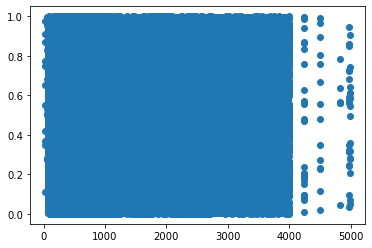

In [13]:
# Wyszukanie danych wymagających standaryzacji lub modyfikacji, ignorując kolumny posiadające znikomy przedział
# {flight_distance}
plt.scatter(data['flight_distance'], np.random.rand(data.shape[0]))

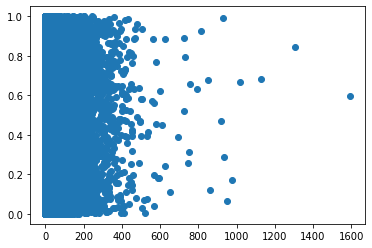

In [14]:
# {departure_delay_in_minutes}
plt.scatter(data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))

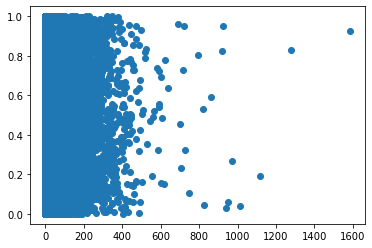

In [15]:
# {arrival_delay_in_minutes}
plt.scatter(data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))

Liczba rekordów w kolumnie {arrival_delay_in_minutes} z wartością większą od 400: 116
Liczba rekordów w kolumnie {departure_delay_in_minutes} z wartością większą od 400: 102


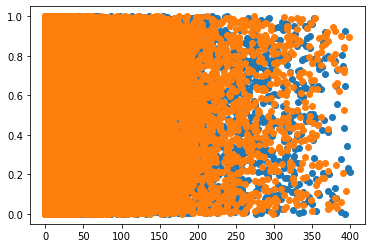

In [16]:
# Dla lepszego rezultatu klasyfikacji warto pozbyć się rekordów z kolumny {departure_delay_in_minutes} 
# oraz {arrival_delay_in_minutes}, które wychodzą poza wartość 400,
# ze względu na wysokie wartości względem reszty oraz małą ilość takowych danych, odpowiednio 102 i 116
print("Liczba rekordów w kolumnie {{arrival_delay_in_minutes}} z wartością większą od 400: {0}"
      .format((data['arrival_delay_in_minutes'] > 400).sum()))
print("Liczba rekordów w kolumnie {{departure_delay_in_minutes}} z wartością większą od 400: {0}"
      .format((data['departure_delay_in_minutes'] > 400).sum()))

data = data[(data['arrival_delay_in_minutes'] <= 400)]
data = data[(data['departure_delay_in_minutes'] <= 400)]

plt.scatter(data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))
plt.scatter(data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))

Liczba rekordów w kolumnie {flight_distance} z wartością większą od 4000: 78


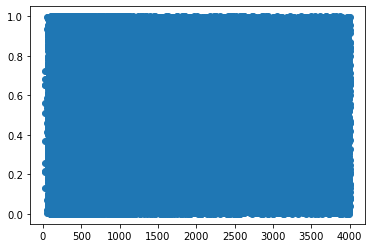

In [17]:
# Warto także, zamienić wartości w kolumnie {flight_distance}, 
# które wykraczają poza przedział (0, 4000), na wartość mediany tejże kolumny
print("Liczba rekordów w kolumnie {{flight_distance}} z wartością większą od 4000: {0}"
      .format((data['flight_distance'] > 4000).sum()))

median = data['flight_distance'].median()
data.loc[data.flight_distance > 4000, 'flight_distance'] = median
plt.scatter(data['flight_distance'], np.random.rand(data.shape[0]))

In [18]:
# Normalizacja wszystkich wymagających tego danych
le = preprocessing.LabelEncoder()

gender_encd = le.fit_transform(data['gender'])
customer_type_encd = le.fit_transform(data['customer_type'])
age_encd = le.fit_transform(data['age'])
type_of_travel_encd = le.fit_transform(data['type_of_travel'])
customer_class_encd = le.fit_transform(data['customer_class'])
flight_distance_encd = le.fit_transform(data['flight_distance'])
baggage_handling_encd = le.fit_transform(data['baggage_handling'])
departure_delay_in_minutes_encd = le.fit_transform(data['departure_delay_in_minutes'])
arrival_delay_in_minutes_encd = le.fit_transform(data['arrival_delay_in_minutes'])

label = le.fit_transform(data['satisfaction'])

features=list(zip(
    gender_encd,
    customer_type_encd,
    age_encd,
    type_of_travel_encd,
    customer_class_encd,
    flight_distance_encd,
    data['inflight_wifi_service'],
    data['departure_arrival_time_convenient'],
    data['ease_of_online_booking'],
    data['gate_location'],
    data['food_and_drink'],
    data['online_boarding'],
    data['seat_comfort'],
    data['inflight_entertainment'],
    data['onboard_service'],
    data['leg_room_service'],
    baggage_handling_encd,
    data['checkin_service'],
    data['inflight_service'],
    data['cleanliness'],
    departure_delay_in_minutes_encd,
    arrival_delay_in_minutes_encd
))

In [19]:
# Podsumowanie badania i obróbki bazy danych:
#     - zmieniono niepoprawną nazwę kolumny {Gender},
#     - usunięto zbędną kolumnę {Unnamed: 0},
#     - wykryto błędne wartości w kolumnie {arrival_delay_in_minutes}, i ze względu
#         na pełną zgodność z wartościami w kolumnie {departure_delay_in_minutes}, zostały one podmienione,
#     - usunięto wartości w kolumnie {arrival_delay_in_minutes} i {departure_delay_in_minutes}, ze względu
#         na wysoką rozbieżność względem reszty danych,
#     - zamieniono niektóre wartości w kolumnie {flight_distance} na wartość mediany tej kolumny, ze względu
#         na dane wykraczające poza przedział,
#     - dokonano normalizacji wszystkich wymagających tego danych

In [20]:
# Porównanie poznanych klasyfikatorów

In [21]:
# Podział bazy danych na zbiór testowy i treningowy
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.33)

print("Zbiór treningowy:")
print("Liczba rekordów: {}".format(len(x_train)))
print("Liczba rekordów o klasie {neutral or dissatisfied}: ", sum(map(lambda x : x == 0, y_train)))
print("Liczba rekordów o klasie {satisfied}: ", sum(map(lambda x : x == 1, y_train)))
print("\nZbiór testowy:")
print("Liczba rekordów: {}".format(len(x_test)))
print("Liczba rekordów o klasie {neutral or dissatisfied}: ", sum(map(lambda x : x == 0, y_test)))
print("Liczba rekordów o klasie {satisfied}: ", sum(map(lambda x : x == 1, y_test)))

Zbiór treningowy:
Liczba rekordów: 86939
Liczba rekordów o klasie {neutral or dissatisfied}:  49147
Liczba rekordów o klasie {satisfied}:  37792

Zbiór testowy:
Liczba rekordów: 42822
Liczba rekordów o klasie {neutral or dissatisfied}:  24231
Liczba rekordów o klasie {satisfied}:  18591


In [22]:
# Przydatne zmienne
feature_names = data.columns.values[:22]
class_names = data['satisfaction'].unique()

In [23]:
# Naiwny Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_predGNB = gnb.predict(x_test)
accuracyGNB = metrics.accuracy_score(y_test, y_predGNB)
confusion_matrixGNB = metrics.confusion_matrix(y_test, y_predGNB, labels=[0, 1])
print("Dokładność:", accuracyGNB)
pd.DataFrame(confusion_matrixGNB, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.8621502965765261


,neutral or dissatisfied,satisfied
neutral or dissatisfied,21786,2445
satisfied,3458,15133


In [24]:
# Drzewo decyzyjne
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_predCLF = clf.predict(x_test)
accuracyCLF = metrics.accuracy_score(y_test, y_predCLF)
confusion_matrixCLF = metrics.confusion_matrix(y_test, y_predCLF, labels=[0, 1])
print("Dokładność:", accuracyCLF)
pd.DataFrame(confusion_matrixCLF, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.9451450189155107


,neutral or dissatisfied,satisfied
neutral or dissatisfied,23018,1213
satisfied,1136,17455


In [25]:
# Ze względu na dużą ilość kolumn, drzewo decyzyjne zawiera ogromną ilość elementów,
# dlatego warto spojrzeć, które kolumny mają największy wpływ na ostateczny rezultat ewaluacji klasyfikatora.
# Postanowiłem, że tylko 3 kolumny mają konkretny wpływ na ostateczną opinię klienta,
# dlatego użyję tylko ich w następnej ewaluacji.
print("Glębokość drzewa: ", clf.get_depth())
print("Ilość elementów w drzewie: ", clf.get_n_leaves())

print("\nWażność poszczególnych kolumn:\n")
importances = list(zip(clf.feature_importances_, feature_names))
for i in sorted(importances, key=lambda x: x[0], reverse=True):
    print(i[1], round(i[0] * 100, 2))

Glębokość drzewa:  39
Ilość elementów w drzewie:  3347

Ważność poszczególnych kolumn:

online_boarding 36.08
inflight_wifi_service 17.67
type_of_travel 14.93
inflight_entertainment 4.86
customer_type 4.09
checkin_service 2.86
flight_distance 2.48
age 2.2
customer_class 2.04
gate_location 1.75
baggage_handling 1.72
inflight_service 1.49
seat_comfort 1.48
leg_room_service 1.19
cleanliness 1.18
onboard_service 0.83
arrival_delay_in_minutes 0.81
departure_delay_in_minutes 0.69
departure_arrival_time_convenient 0.64
food_and_drink 0.41
ease_of_online_booking 0.39
gender 0.21


In [26]:
# Drzewo decyzyjne (po modyfikacji)
new_features=list(zip(
    type_of_travel_encd,
    data['inflight_wifi_service'],
    data['online_boarding'],
))

new_x_train, new_x_test, new_y_train, new_y_test = train_test_split(new_features, label, test_size=0.33)

clf2 = DecisionTreeClassifier()
clf2.fit(new_x_train, new_y_train)
y_predCLF2 = clf2.predict(new_x_test)
accuracyCLF2 = metrics.accuracy_score(new_y_test, y_predCLF2)
confusion_matrixCLF2 = metrics.confusion_matrix(new_y_test, y_predCLF2, labels=[0, 1])
print("Dokładność:", accuracyCLF2)
pd.DataFrame(confusion_matrixCLF2, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.8914576619494652


,neutral or dissatisfied,satisfied
neutral or dissatisfied,21679,2664
satisfied,1984,16495


In [27]:
# Dane drzewa po modyfikacjach
print("Glębokość drzewa: ", clf2.get_depth())
print("Ilość elementów w drzewie: ", clf2.get_n_leaves())

Glębokość drzewa:  9
Ilość elementów w drzewie:  45


In [28]:
# k-najbliższych sąsiadów (k=3)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train, y_train)
y_pred3 = knn3.predict(x_test)
accuracy3 = metrics.accuracy_score(y_test, y_pred3)
confusion_matrix3 = metrics.confusion_matrix(y_test, y_pred3, labels=[0, 1])
print("Dokładność:", accuracy3)
pd.DataFrame(confusion_matrix3, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.7408107981878473


,neutral or dissatisfied,satisfied
neutral or dissatisfied,19289,4942
satisfied,6157,12434


In [29]:
# k-najbliższych sąsiadów (k=5)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(x_train, y_train)
y_pred5 = knn5.predict(x_test)
accuracy5 = metrics.accuracy_score(y_test, y_pred5)
confusion_matrix5 = metrics.confusion_matrix(y_test, y_pred5, labels=[0, 1])
print("Dokładność:", accuracy5)
pd.DataFrame(confusion_matrix5, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.747279435804026


,neutral or dissatisfied,satisfied
neutral or dissatisfied,19623,4608
satisfied,6214,12377


In [30]:
# k-najbliższych sąsiadów (k=11)
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(x_train, y_train)
y_pred11 = knn11.predict(x_test)
accuracy11 = metrics.accuracy_score(y_test, y_pred11)
confusion_matrix11 = metrics.confusion_matrix(y_test, y_pred11, labels=[0, 1])
print("Dokładność:", accuracy11)
pd.DataFrame(confusion_matrix11, columns = ['neutral or dissatisfied', 'satisfied'], index = ['neutral or dissatisfied', 'satisfied'])

Dokładność: 0.7464387464387464


,neutral or dissatisfied,satisfied
neutral or dissatisfied,19880,4351
satisfied,6507,12084


In [31]:
# Na podstawie dokładności i prezentacji macierzy błędu dla poszczególnego klasyfikatora, 
# możemy stwierdzić, że najlepiej ze wszystkich wypadło drzewo decyzyjne. 
# Klasyfikator ten wykazał najlepszą dokładność podczas ewaluacji oraz
# może pochwalić się najlepszym stosunkiem wartości w maciezy błędów.
# Ze względu na to, że badamy satysfakcję klientów z pasażerskich usług lotniczych,
# najważniejszym jest dla nas, aby móc z jak największą dokładnością oszacować opinię klienta,
# bez względu na to, czy będzie ona negatywna/neutralna, czy pozytywna.

In [32]:
# Rozszerzona klasyfikacja i analiza

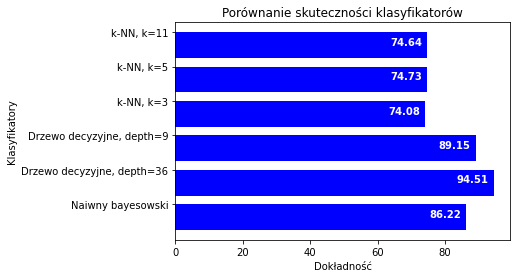

In [33]:
# Porównanie skuteczności klasyfikatorów
labels = ['Naiwny bayesowski', 'Drzewo decyzyjne, depth=36', 'Drzewo decyzyjne, depth=9', 'k-NN, k=3', 'k-NN, k=5', 'k-NN, k=11']
values = [accuracyGNB * 100, accuracyCLF * 100, accuracyCLF2 * 100, accuracy3 * 100, accuracy5 * 100, accuracy11 * 100]

fig, ax = plt.subplots()

width = 0.75
ind = np.arange(len(values))  # the x locations for the groups
ax.barh(ind, values, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels, minor=False)
plt.title('Porównanie skuteczności klasyfikatorów')
plt.xlabel('Dokładność')
plt.ylabel('Klasyfikatory') 

for i, v in enumerate(values):
    ax.text(v - 11, i, str(round(v, 2)), color='white', fontweight='bold')

plt.show()

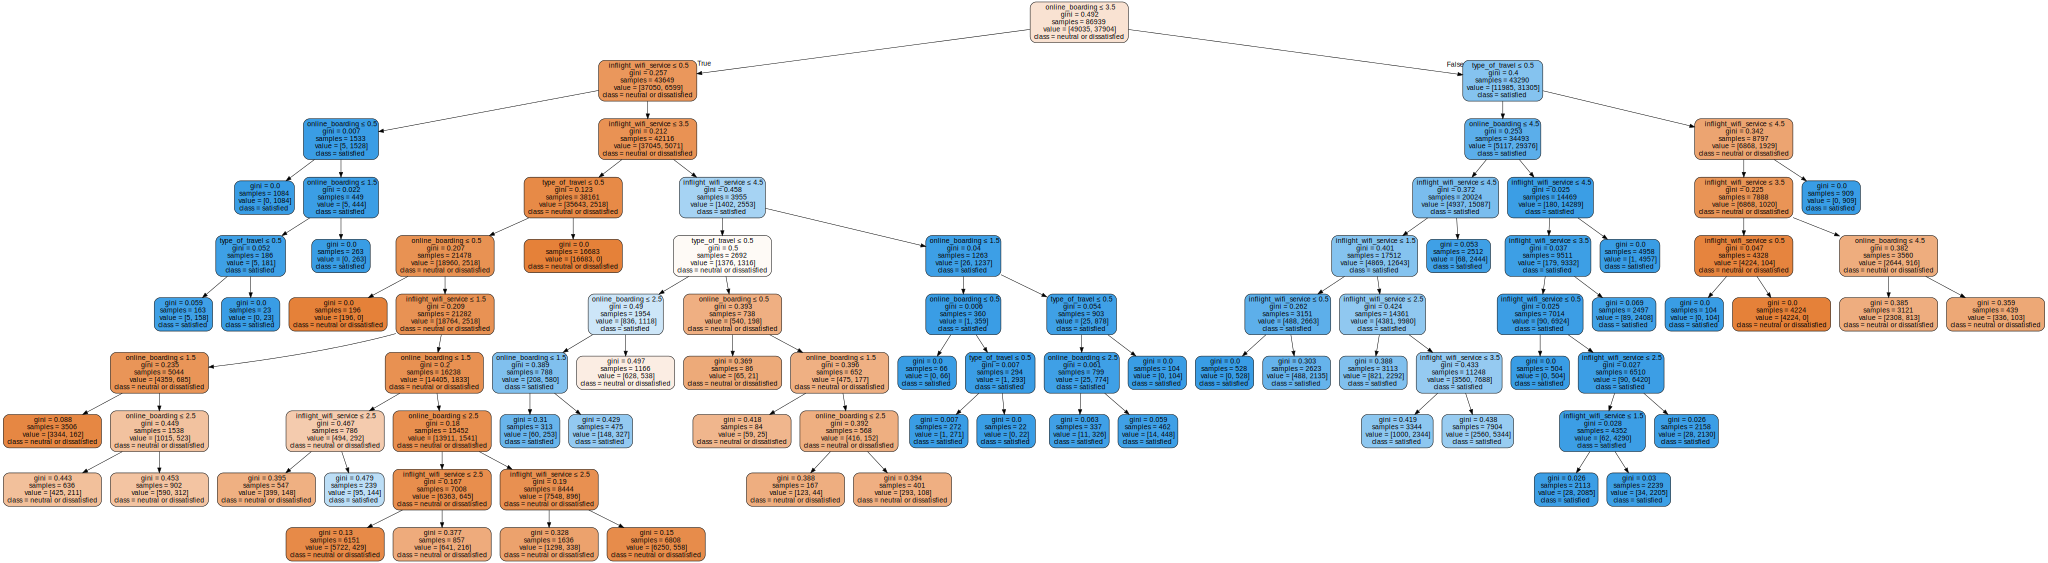

In [34]:
# Drzewo decyzyjne w postaci grafu
dot_data = export_graphviz(
    clf2, 
    out_file=None, 
    feature_names=['type_of_travel', 'inflight_wifi_service', 'online_boarding'], 
    class_names=class_names,
    filled=True, rounded=True, 
    special_characters=True
)  
graph = graphviz.Source(dot_data) 
graph.render("./results/tree2") 
graph

In [35]:
# Drzewo decyzyjne w formie tekstowej
export_text(clf2, feature_names=['type_of_travel', 'inflight_wifi_service', 'online_boarding'])

'|--- online_boarding <= 3.50\n|   |--- inflight_wifi_service <= 0.50\n|   |   |--- online_boarding <= 0.50\n|   |   |   |--- class: 1\n|   |   |--- online_boarding >  0.50\n|   |   |   |--- online_boarding <= 1.50\n|   |   |   |   |--- type_of_travel <= 0.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |   |--- type_of_travel >  0.50\n|   |   |   |   |   |--- class: 1\n|   |   |   |--- online_boarding >  1.50\n|   |   |   |   |--- class: 1\n|   |--- inflight_wifi_service >  0.50\n|   |   |--- inflight_wifi_service <= 3.50\n|   |   |   |--- type_of_travel <= 0.50\n|   |   |   |   |--- online_boarding <= 0.50\n|   |   |   |   |   |--- class: 0\n|   |   |   |   |--- online_boarding >  0.50\n|   |   |   |   |   |--- inflight_wifi_service <= 1.50\n|   |   |   |   |   |   |--- online_boarding <= 1.50\n|   |   |   |   |   |   |   |--- class: 0\n|   |   |   |   |   |   |--- online_boarding >  1.50\n|   |   |   |   |   |   |   |--- online_boarding <= 2.50\n|   |   |   |   |   |   |   |   |-

In [36]:
# Ewaluacja klasyfikatorów z proporcją przy podziale na zbiór treningowy i testowy wynoszącą 20/80
x_train20, x_test20, y_train20, y_test20 = train_test_split(features, label, test_size=0.20)

gnb_20 = GaussianNB()
gnb_20.fit(x_train20, y_train20)
y_predGNB_20 = gnb_20.predict(x_test20)
accuracyGNB_20 = metrics.accuracy_score(y_test20, y_predGNB_20)
confusion_matrixGNB_20 = metrics.confusion_matrix(y_test20, y_predGNB_20, labels=[0, 1])

clf_20 = DecisionTreeClassifier()
clf_20.fit(x_train20, y_train20)
y_predCLF_20 = clf_20.predict(x_test20)
accuracyCLF_20 = metrics.accuracy_score(y_test20, y_predCLF_20)
confusion_matrixCLF_20 = metrics.confusion_matrix(y_test20, y_predCLF_20, labels=[0, 1])

new_x_train20, new_x_test20, new_y_train20, new_y_test20 = train_test_split(new_features, label, test_size=0.20)

clf2_20 = DecisionTreeClassifier()
clf2_20.fit(new_x_train20, new_y_train20)
y_predCLF2_20 = clf2_20.predict(new_x_test20)
accuracyCLF2_20 = metrics.accuracy_score(new_y_test20, y_predCLF2_20)
confusion_matrixCLF2_20 = metrics.confusion_matrix(new_y_test20, y_predCLF2_20, labels=[0, 1])

knn3_20 = KNeighborsClassifier(n_neighbors=3)
knn3_20.fit(x_train20, y_train20)
y_pred3_20 = knn3_20.predict(x_test20)
accuracy3_20 = metrics.accuracy_score(y_test20, y_pred3_20)
confusion_matrix3_20 = metrics.confusion_matrix(y_test20, y_pred3_20, labels=[0, 1])

knn5_20 = KNeighborsClassifier(n_neighbors=5)
knn5_20.fit(x_train20, y_train20)
y_pred5_20 = knn5_20.predict(x_test20)
accuracy5_20 = metrics.accuracy_score(y_test20, y_pred5_20)
confusion_matrix5_20 = metrics.confusion_matrix(y_test20, y_pred5_20, labels=[0, 1])

knn11_20 = KNeighborsClassifier(n_neighbors=11)
knn11_20.fit(x_train20, y_train20)
y_pred11_20 = knn11_20.predict(x_test20)
accuracy11_20 = metrics.accuracy_score(y_test20, y_pred11_20)
confusion_matrix11_20 = metrics.confusion_matrix(y_test20, y_pred11_20, labels=[0, 1])

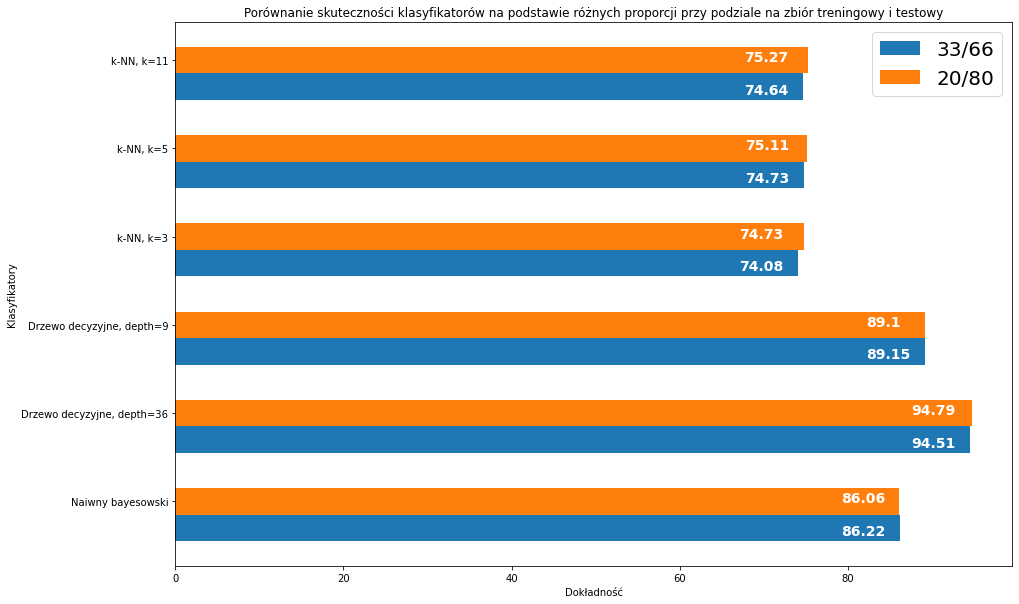

In [37]:
# Wpływ użytej proporcji przy podziale na zbiór treningowy i testowy na ostateczny wynik klasyfikacji
values_20 = [accuracyGNB_20 * 100, accuracyCLF_20 * 100, accuracyCLF2_20 * 100, accuracy3_20 * 100, accuracy5_20 * 100, accuracy11_20 * 100]

plt.rcParams["figure.figsize"] = (15, 10)

fig, ax = plt.subplots()

width = 0.3
ind = np.arange(len(labels))
rects1 = ax.barh(ind - width/2, values, width, label='33/66')
rects2 = ax.barh(ind + width/2, values_20, width, label='20/80')
plt.title('Porównanie skuteczności klasyfikatorów na podstawie różnych proporcji przy podziale na zbiór treningowy i testowy')
plt.xlabel('Dokładność')
plt.ylabel('Klasyfikatory') 
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels, minor=False)
ax.legend(prop={'size': 20})

for i, (v1, v2) in enumerate(zip(values, values_20)):
    ax.text(v1 - 7, i, str(round(v2, 2)) + '\n\n' + str(round(v1, 2)), color='white', fontweight='bold', fontsize=14, verticalalignment='center')    

plt.show()